# Project 04: Data Wrangling: WeRateDogs Tweets Archive

## Overview Data

In [47]:
df1_clean.describe()

,tweet_id,retweet_count,favorite_count,rating
count,1.981000e+03,1981.000000,1981.000000,1981.000000
mean,7.355944e+17,2457.172135,8281.034326,1.053508
std,6.742851e+16,4405.231579,12207.191552,0.219306
min,6.660209e+17,11.000000,72.000000,0.000000
25%,6.758209e+17,548.000000,1780.000000,1.000000
50%,7.081494e+17,1180.000000,3706.000000,1.100000
75%,7.873980e+17,2788.000000,10295.000000,1.200000
max,8.924206e+17,77957.000000,156437.000000,1.400000


## Analyze & Visualize Data

### Figure 1: Tweeting trend over time

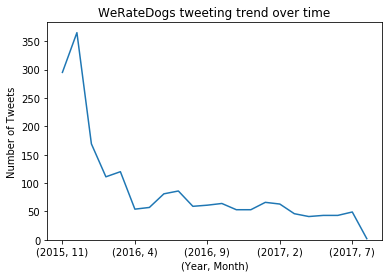

In [49]:
data = df1_clean.tweet_id.groupby([df1_clean["timestamp"].dt.year, df1_clean["timestamp"].dt.month]).count()
ax = data.plot(kind='line', title='Number of Tweets over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )

### Figure 2: Rating distribution

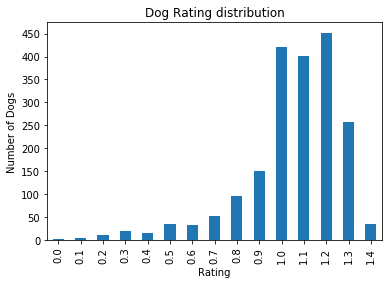

In [50]:
ax = df1_clean.rating.value_counts().sort_index().plot(kind='bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])

### Figure 3: Retweets and Favorites vs. Rating 

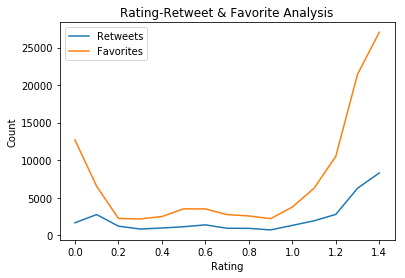

In [61]:
rating_analyze=pd.DataFrame(columns=['rating','retweet','favorite'])
rating_analyze['rating']=values
for x in rating_analyze['rating']:
    this_df=df1_clean[df1_clean.rating==x]
    rating_analyze.loc[rating_analyze.rating==x,'retweet']=this_df.retweet_count.mean()
    rating_analyze.loc[rating_analyze.rating==x,'favorite']=this_df.favorite_count.mean()
rating_analyze[['rating','retweet','favorite']].plot(x='rating',title='Rating-Retweet & Favorite Analysis')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.legend(('Retweets', 'Favorites'));

### Figure 4: Retweets and Favorites Trend over time

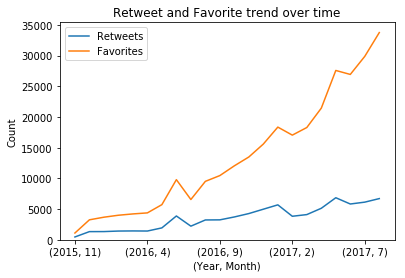

In [60]:
plt.subplots(1, sharex=True)
df1_clean.retweet_count.groupby([df1_clean["timestamp"].dt.year, df1_clean["timestamp"].dt.month]).mean().plot(kind='line')
df1_clean.favorite_count.groupby([df1_clean["timestamp"].dt.year, df1_clean["timestamp"].dt.month]).mean().plot(kind='line').set_ylim(0, )
plt.title('Retweet and Favorite trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'));

## Insights

- WeRateDogs tweeting trends is going down over time.
- Dogs rating distribution is over 1 (10/10) and most common rating is 1.2, 1.0 and 1.1. 
- However, `favorite` also raises for the dog rates really poor: ugly dog get some favorite also. As normal, high rating dogs have more favorites and more retweets.
- Despite the downtrend in number of tweets, retweet and favorite is still up for WeRateDogs.